# Jordskjelvplotting

Her skal me plotta litt jordskjelv. Me bruker jordskjelvdata frå [USGS sin jordskjelvkatalog](https://earthquake.usgs.gov/earthquakes/search/). I tillegg trengs modulen `GeoPandas`. Følg [installasjonsguiden](https://geopandas.org/en/stable/getting_started/install.html) deira for å koma i gang. 

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

Les inn datamaterialet med pandas. 

In [3]:
skjelv = pd.read_csv("jordskjelv120922.csv")

Viss me vil sjå kor stor tabellen me har lasta inn er, kan me bruka `shape`:

In [7]:
skjelv.shape

(20000, 22)

Her ser me at tabellen vår har 20000 rader og 22 kolonner.

For å få ei oversikt over datamaterialet bruker me `head()` funksjonen som viser dei fem første radene. 

In [9]:
skjelv.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-09-12T08:14:40.075Z,6.1766,127.5713,10.000,5.6,mww,126.0,45.0,2.169,0.64,...,2022-09-12T10:18:04.862Z,"155 km E of Pondaguitan, Philippines",earthquake,4.57,1.811,0.098,10.0,reviewed,us,us
1,2022-09-11T09:06:51.111Z,-20.9751,-178.9445,629.934,5.5,mb,129.0,19.0,3.499,0.74,...,2022-09-12T09:09:54.327Z,Fiji region,earthquake,9.92,5.850,0.023,638.0,reviewed,us,us
2,2022-09-10T23:46:57.827Z,-6.2557,146.4692,90.013,7.6,mww,121.0,18.0,3.203,0.79,...,2022-09-12T09:56:17.727Z,"66 km E of Kainantu, Papua New Guinea",earthquake,5.73,3.200,0.037,70.0,reviewed,us,us
3,2022-09-10T23:24:00.731Z,-1.2028,98.6188,10.000,5.7,mb,114.0,43.0,2.700,1.07,...,2022-09-11T23:27:10.229Z,"179 km WSW of Pariaman, Indonesia",earthquake,7.09,1.823,0.042,198.0,reviewed,us,us
4,2022-09-10T23:10:44.391Z,-1.1241,98.6239,20.000,6.0,mww,110.0,34.0,2.630,0.95,...,2022-09-11T23:24:02.608Z,"175 km WSW of Pariaman, Indonesia",earthquake,6.82,1.818,0.089,12.0,reviewed,us,us


For å få innblikk i litt statistikk frå tabellen kan me bruka `describe`. 

In [5]:
skjelv.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,20000.000000,20000.000000,20000.000000,20000.000000,7204.000000,9818.000000,4160.000000,19753.000000,3704.000000,7054.000000,2870.000000,4906.000000
mean,-0.288804,33.521782,70.540792,5.872598,271.579262,43.488257,4.354968,1.003689,7.081816,4.054779,0.059454,48.378108
std,30.040841,126.716191,127.504116,0.419776,161.020718,29.029916,5.487181,0.200203,2.322105,8.000387,0.032322,61.945916
min,-77.080000,-179.997000,-3.000000,5.500000,0.000000,8.000000,0.008000,0.040000,0.085000,0.000000,0.000000,0.000000
25%,-20.416000,-82.526750,10.000000,5.600000,142.000000,24.000000,1.182500,0.890000,5.800000,1.800000,0.046000,18.000000
50%,-4.512500,96.661000,32.000000,5.700000,249.000000,36.000000,2.547000,1.000000,7.100000,2.300000,0.055000,32.000000
75%,22.225050,143.582925,50.400000,6.000000,378.000000,54.000000,5.168500,1.110000,8.500000,4.400000,0.068000,56.000000
max,86.922900,179.998100,700.000000,9.100000,934.000000,313.000000,39.730000,2.820000,15.800000,569.200000,0.700000,941.000000


Her ser me at gjennomsnittstyrken (magnituden - `mag`) er ca. 5,87 og gjennomsnittsdjupna (`depth`) 70,5 km. 

Som me har sett over har tabellen mange kolonner, ikkje alle er like relevante for oss. Me kan sortera ut dei me treng vidare. Skriv først ut ei liste med kolonnenamn for å få oversikt over alle kolonnene. 

In [4]:
skjelv.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

## Sortere i tabellen

Det første me gjer er å luka ut dei radene som ikkje er jordskjelv. 

In [11]:
skjelv = skjelv[skjelv["type"] == "earthquake"]
skjelv.shape

(19880, 22)

Tabelen vart 120 rader kortare, så me har framleis ca. 20000 rader i tabellen vår.

Plukker ut dei mest relevante kolonnene. Dato, lengde- og breddegrad, djupne og styrke:

In [5]:
skjelv = skjelv[["time", "latitude", "longitude", "depth", "mag"]]
skjelv.head()

,time,latitude,longitude,depth,mag
0,2022-09-12T08:14:40.075Z,6.1766,127.5713,10.000,5.6
1,2022-09-11T09:06:51.111Z,-20.9751,-178.9445,629.934,5.5
2,2022-09-10T23:46:57.827Z,-6.2557,146.4692,90.013,7.6
3,2022-09-10T23:24:00.731Z,-1.2028,98.6188,10.000,5.7
4,2022-09-10T23:10:44.391Z,-1.1241,98.6239,20.000,6.0


## Statistikk (grafisk)

Lagar litt ulike visualiseringar av korleis styrke og djupne er fordelt i tabellen: 

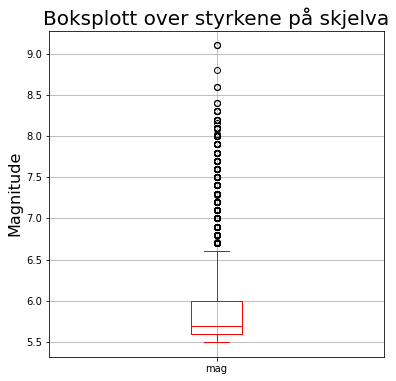

In [6]:
boksplot = skjelv.boxplot(column = "mag", figsize = (6,6), color = "red")
plt.title("Boksplott over styrkene på skjelva", fontsize = 20)
plt.ylabel("Magnitude", fontsize = 16)
plt.show()

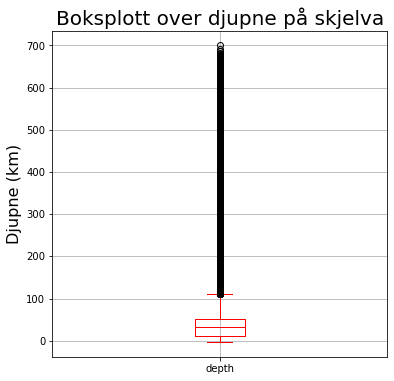

In [7]:
boksplot = skjelv.boxplot(column = "depth", figsize = (6,6), color = "red")
plt.title("Boksplott over djupne på skjelva", fontsize = 20)
plt.ylabel("Djupne (km)", fontsize = 16)
plt.show()

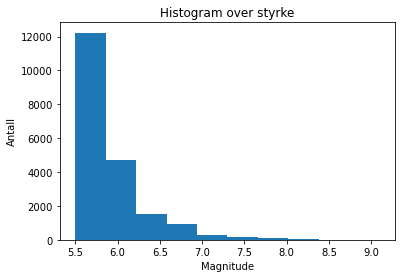

In [8]:
figur = plt.hist(skjelv["mag"])
plt.title("Histogram over styrke")
plt.xlabel("Magnitude")
plt.ylabel("Antall")
plt.show()

## GeoDataFrame

Lagar ein GeoDataFrame med `GeoPandas`. 

In [10]:
skjelv_gdf = gpd.GeoDataFrame(skjelv, 
                              geometry = gpd.points_from_xy(
                                  skjelv.longitude, 
                                  skjelv.latitude)
                             )
skjelv_gdf.head()

,time,latitude,longitude,depth,mag,geometry
0,2022-09-12T08:14:40.075Z,6.1766,127.5713,10.000,5.6,POINT (127.57130 6.17660)
1,2022-09-11T09:06:51.111Z,-20.9751,-178.9445,629.934,5.5,POINT (-178.94450 -20.97510)
2,2022-09-10T23:46:57.827Z,-6.2557,146.4692,90.013,7.6,POINT (146.46920 -6.25570)
3,2022-09-10T23:24:00.731Z,-1.2028,98.6188,10.000,5.7,POINT (98.61880 -1.20280)
4,2022-09-10T23:10:44.391Z,-1.1241,98.6239,20.000,6.0,POINT (98.62390 -1.12410)


## Plotting

Startar først med plotting av alle skjelv på eit verdskart. 

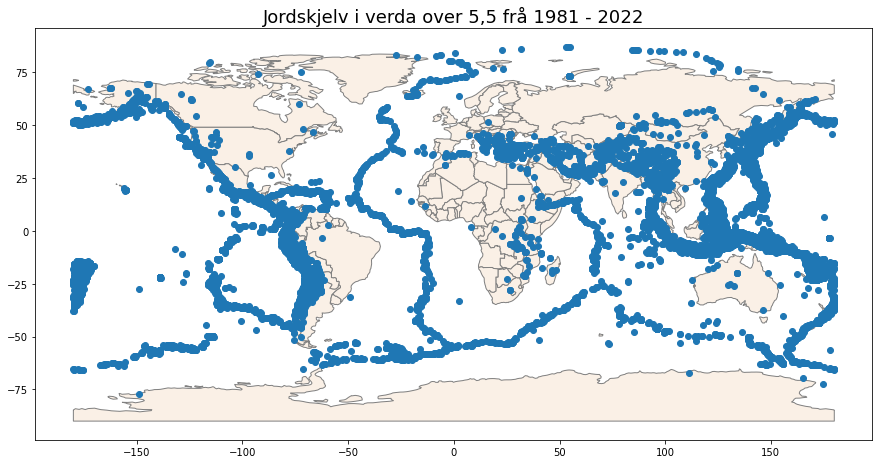

In [29]:
# bakgrunnskart - data
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# plotte bakgrunnskart
base = world.plot(color = "linen", 
                  edgecolor = "gray", 
                  figsize = (15, 8)
                 )

skjelv_gdf.plot(ax = base) 

plt.title("Jordskjelv i verda over 5,5 frå 1981 - 2022", fontsize = 18)
plt.show()

### Variabel storleik på punkt etter styrke

For å få fram ulikskapar mellom skjelva kan me plotta punkta slik at dei vert større di sterkare skjelva dei representerer er. Skjelva er frå 5.5 til 9.1 i styrke. Legg til ei ny kolonne i tabellen for storleik på markør. For at den skal gå frå 1 og oppover, trekk me 4.5 frå verdien til `mag`:

In [30]:
skjelv_gdf["markør"] = skjelv_gdf["mag"] - 4.5
skjelv_gdf.head()

,time,latitude,longitude,depth,mag,geometry,markør
0,2022-09-12T08:14:40.075Z,6.1766,127.5713,10.000,5.6,POINT (127.57130 6.17660),1.1
1,2022-09-11T09:06:51.111Z,-20.9751,-178.9445,629.934,5.5,POINT (-178.94450 -20.97510),1.0
2,2022-09-10T23:46:57.827Z,-6.2557,146.4692,90.013,7.6,POINT (146.46920 -6.25570),3.1
3,2022-09-10T23:24:00.731Z,-1.2028,98.6188,10.000,5.7,POINT (98.61880 -1.20280),1.2
4,2022-09-10T23:10:44.391Z,-1.1241,98.6239,20.000,6.0,POINT (98.62390 -1.12410),1.5


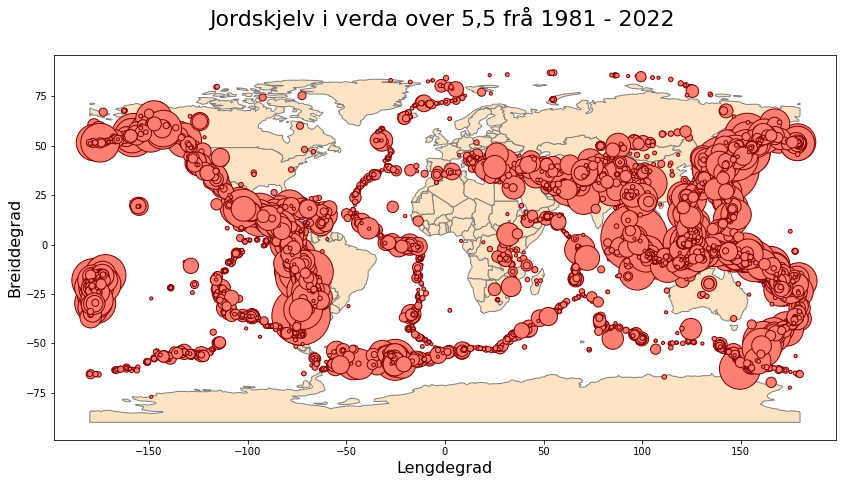

In [42]:
# bakgrunnskart
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

base = world.plot(color = "bisque", 
                  edgecolor = "gray", 
                  figsize = (14, 8)
                 )

# plottar skjelva
skjelv_gdf.plot(ax = base, 
                kind = "scatter", 
                x = "longitude", 
                y = "latitude",
                marker = "o",
                color = "salmon",
                s = 10*skjelv_gdf["markør"]**4,   # størrelse på pkt. 
                edgecolor = "maroon"
               )

plt.title("Jordskjelv i verda over 5,5 frå 1981 - 2022 \n", fontsize = 22)
plt.xlabel("Lengdegrad", fontsize = 16)
plt.ylabel("Breiddegrad", fontsize = 16)
#plt.savefig("jordskjelv_verda_styrke.png", dpi = 300)
plt.show()

# Zoome inn på eit område

Kartet kan bli litt uoversiktleg, så det kan vera greitt å avgrensa området vårt. 

In [43]:
# Avgrensingar for rådata og kartplotting
lat_min = -25
lat_maks = 60
long_min = 80
long_maks = 170

In [44]:
# lagar ny gdf til avgrensa område
område_skjelv = skjelv_gdf[(skjelv_gdf.latitude > lat_min) 
                           & (skjelv_gdf.latitude < lat_maks)
                           & (skjelv_gdf.longitude > long_min) 
                           & (skjelv_gdf.longitude < long_maks)
                          ]

In [45]:
område_skjelv.shape

(9336, 7)

Ser at den nye tabellen har 9336 jordskjelv (dvs. ein betydeleg del av heile tabellen). Ser på dei første linjene i tabellen:

In [47]:
område_skjelv.head(10)

,time,latitude,longitude,depth,mag,geometry,markør
0,2022-09-12T08:14:40.075Z,6.1766,127.5713,10.000,5.6,POINT (127.57130 6.17660),1.1
2,2022-09-10T23:46:57.827Z,-6.2557,146.4692,90.013,7.6,POINT (146.46920 -6.25570),3.1
3,2022-09-10T23:24:00.731Z,-1.2028,98.6188,10.000,5.7,POINT (98.61880 -1.20280),1.2
4,2022-09-10T23:10:44.391Z,-1.1241,98.6239,20.000,6.0,POINT (98.62390 -1.12410),1.5
5,2022-09-10T00:05:12.731Z,-2.2198,138.1856,19.108,6.2,POINT (138.18560 -2.21980),1.7
6,2022-09-09T23:44:10.124Z,-2.2415,138.2069,19.933,5.9,POINT (138.20690 -2.24150),1.4
7,2022-09-09T23:31:47.383Z,-2.2457,138.2009,18.000,6.2,POINT (138.20090 -2.24570),1.7
9,2022-09-07T18:09:37.118Z,-3.1959,101.4714,48.814,5.6,POINT (101.47140 -3.19590),1.1
13,2022-09-05T04:52:19.849Z,29.7263,102.2790,10.000,6.6,POINT (102.27900 29.72630),2.1
16,2022-09-02T22:39:51.598Z,-5.6569,148.7090,126.000,6.1,POINT (148.70900 -5.65690),1.6


Her ser me at indeksen (talet til venstre) ikkje er heilt oppdatert når me har plukka bort ca. halvparten av skjelva. Det kan me fiksa: 

In [48]:
område_skjelv = område_skjelv.reset_index(drop=True)
område_skjelv.head(10)

,time,latitude,longitude,depth,mag,geometry,markør
0,2022-09-12T08:14:40.075Z,6.1766,127.5713,10.000,5.6,POINT (127.57130 6.17660),1.1
1,2022-09-10T23:46:57.827Z,-6.2557,146.4692,90.013,7.6,POINT (146.46920 -6.25570),3.1
2,2022-09-10T23:24:00.731Z,-1.2028,98.6188,10.000,5.7,POINT (98.61880 -1.20280),1.2
3,2022-09-10T23:10:44.391Z,-1.1241,98.6239,20.000,6.0,POINT (98.62390 -1.12410),1.5
4,2022-09-10T00:05:12.731Z,-2.2198,138.1856,19.108,6.2,POINT (138.18560 -2.21980),1.7
5,2022-09-09T23:44:10.124Z,-2.2415,138.2069,19.933,5.9,POINT (138.20690 -2.24150),1.4
6,2022-09-09T23:31:47.383Z,-2.2457,138.2009,18.000,6.2,POINT (138.20090 -2.24570),1.7
7,2022-09-07T18:09:37.118Z,-3.1959,101.4714,48.814,5.6,POINT (101.47140 -3.19590),1.1
8,2022-09-05T04:52:19.849Z,29.7263,102.2790,10.000,6.6,POINT (102.27900 29.72630),2.1
9,2022-09-02T22:39:51.598Z,-5.6569,148.7090,126.000,6.1,POINT (148.70900 -5.65690),1.6


## Plottar det nye områder

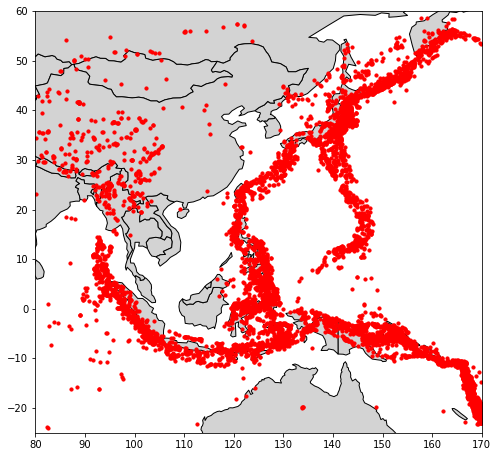

In [49]:
base = world.plot(color="lightgrey",
                  edgecolor="black", 
                  figsize=(8,10),
                 )

base.set_ylim([lat_min, lat_maks])
base.set_xlim([long_min, long_maks])

område_skjelv.plot(ax = base, 
                   color = "red",
                   markersize = 10
                  )

plt.show()

# Ulike fargar etter djupne

I dette området kan det vera interessant å sjå på korleis djupna på skjelva fordeler seg. Me deler inn datamaterialet i grunne, middels og djupe skjelv, med 30 km og 300 km som grenser mellom dei tre kategoriane. 

In [50]:
område_djup = område_skjelv[(område_skjelv.depth > 300)]
område_middels = område_skjelv[(område_skjelv.depth <= 300)
                               & (område_skjelv.depth > 30)]
område_grunn = område_skjelv[(område_skjelv.depth <= 30)]

Plottar dei nye gdf-ane:

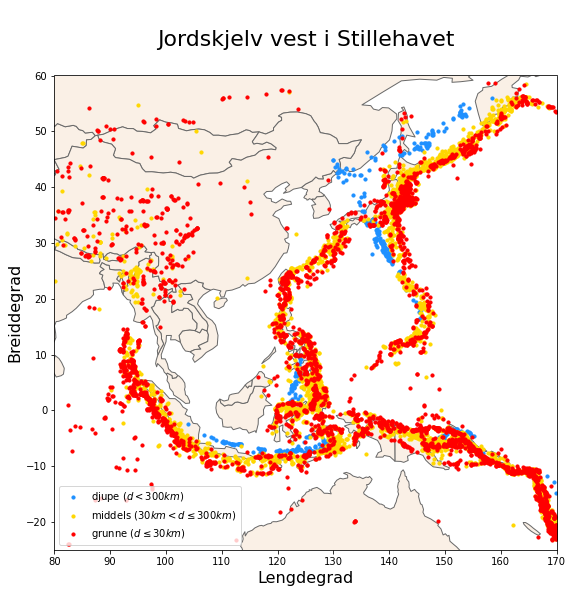

In [58]:
# bakgrunnskart
base = world.plot(color="linen",
                  edgecolor="dimgray", 
                  figsize=(9,9),
                 )

# avgrensing (til området)
base.set_ylim([lat_min, lat_maks])
base.set_xlim([long_min, long_maks])

# plotte skjelva
område_djup.plot(ax = base, color="dodgerblue", markersize=10)
område_middels.plot(ax = base, color="gold", markersize=10)
område_grunn.plot(ax = base, color="red", markersize=10)

# pynt
plt.title("\nJordskjelv vest i Stillehavet\n", fontsize = 22)
plt.xlabel("Lengdegrad", fontsize = 16)
plt.ylabel("Breiddegrad", fontsize = 16)
plt.legend(["djupe ($d < 300 km$)", 
           "middels ($30 km < d \leq 300 km$)",
           "grunne ($d \leq 30 km$)"
           ])
#plt.savefig("jordskjelv_stillehavet_djupne.png", dpi=200, bbox_inches="tight")
plt.show()